<a href="https://colab.research.google.com/github/Pravalika-Challuri/clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries

In [1]:
!pip install openpyxl
import pandas as pd
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name=1)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
# Column rename
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)


In [4]:
#Set ID as Index Column
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


DATA EXPLORATION

In [5]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [6]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',df.cc1_miles.unique())
print('unique_cc2',df.cc2_miles.unique())
print('unique_cc3',df.cc3_miles.unique())


unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


duplicate value check

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
df = df.drop_duplicates()



In [10]:
df.duplicated().sum()

0

In [11]:
#Checking missing values
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


EXPLORATARY DATA ANALYSIS

In [12]:
import plotly.express as px

for column in df.columns:
    fig = px.histogram(df, x=column, title=f'{column} Distribution')
    fig.show()

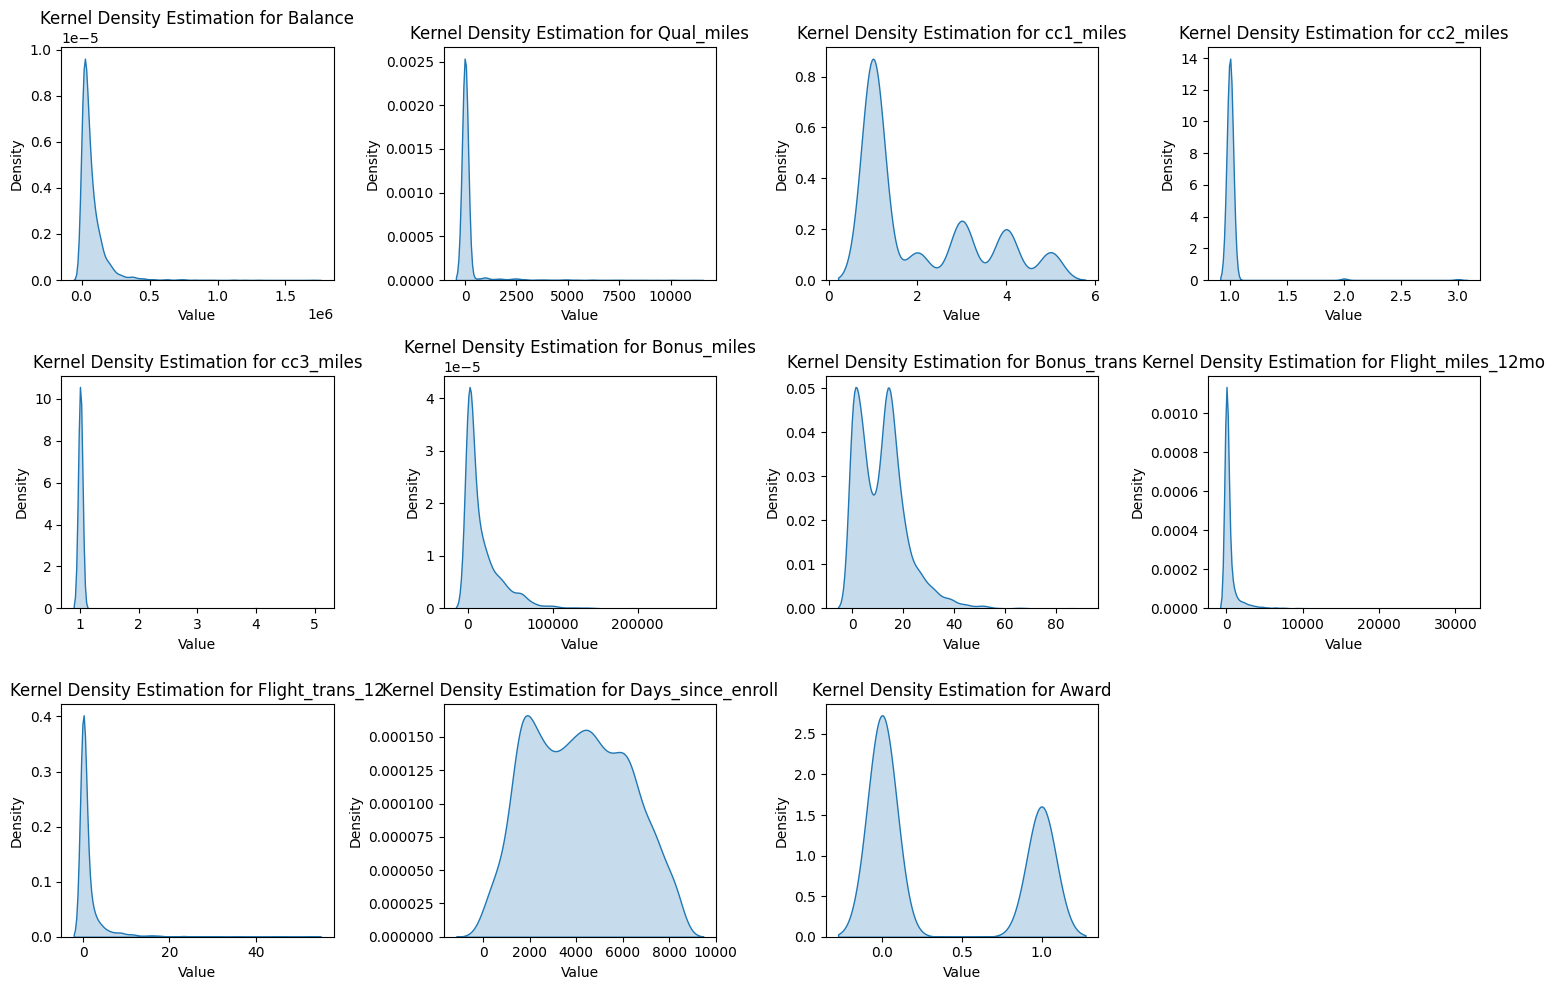

In [16]:
#kernel desnity estimation
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure containing subplots
fig = plt.figure(figsize=(15, 10))
# Plot KDE for each feature
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(3, 4, i + 1)
    sns.kdeplot(df[column], fill=True, ax=ax)
    ax.set_title(f'Kernel Density Estimation for {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
plt.tight_layout()
plt.show()


Outliers detection

<ipython-input-17-c9300bd44281>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-c9300bd44281>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-c9300bd44281>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-c9300bd44281>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-c9300bd44281>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

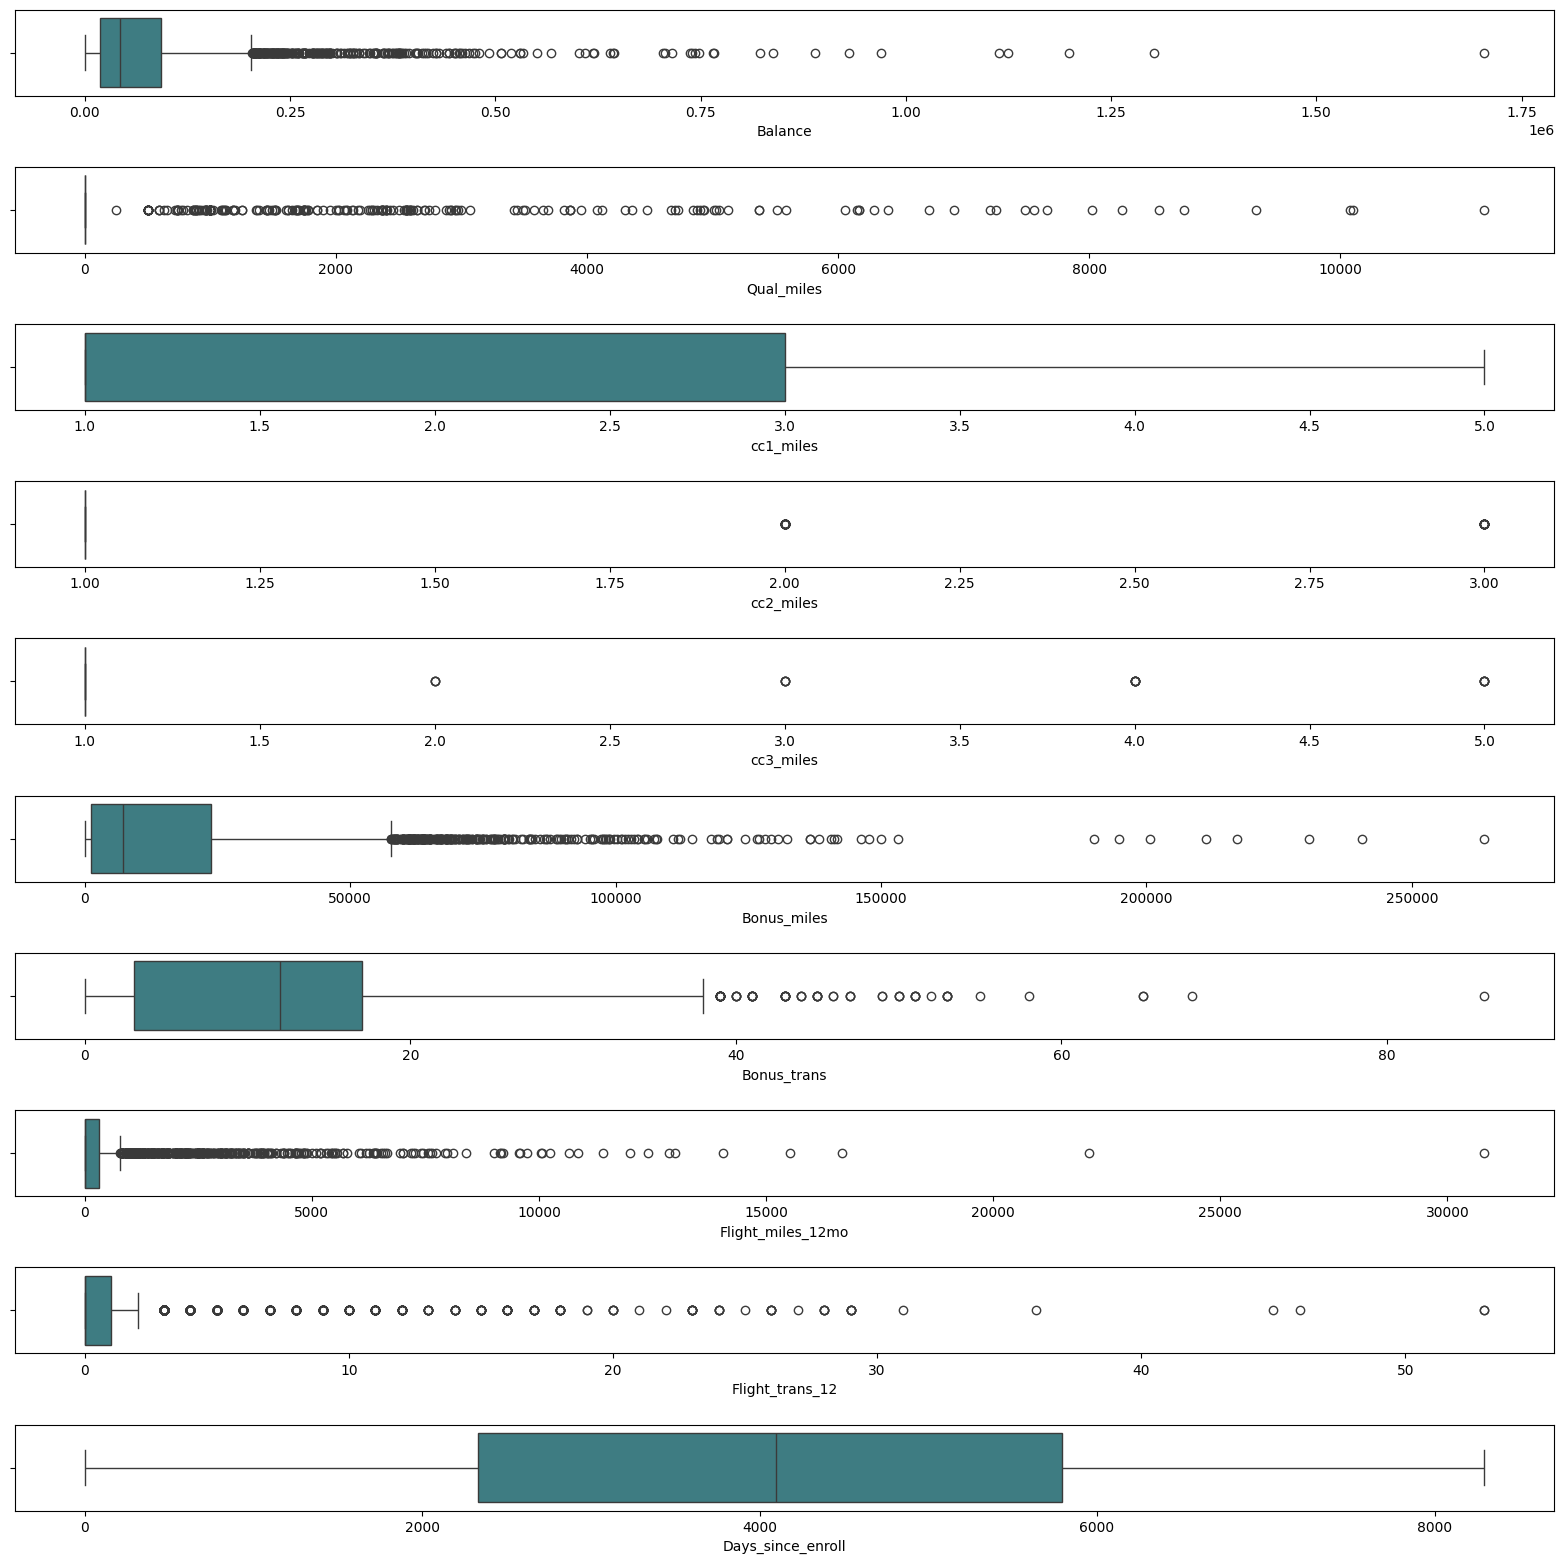

In [17]:
ot=df.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

Box plot for every feature

<Axes: >

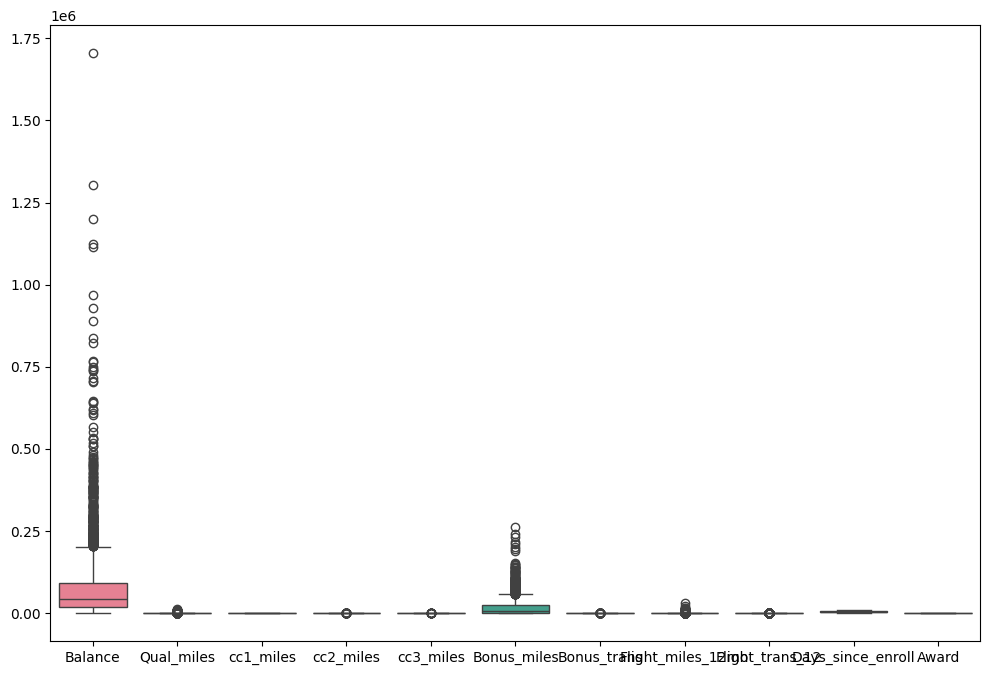

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)



<Axes: >

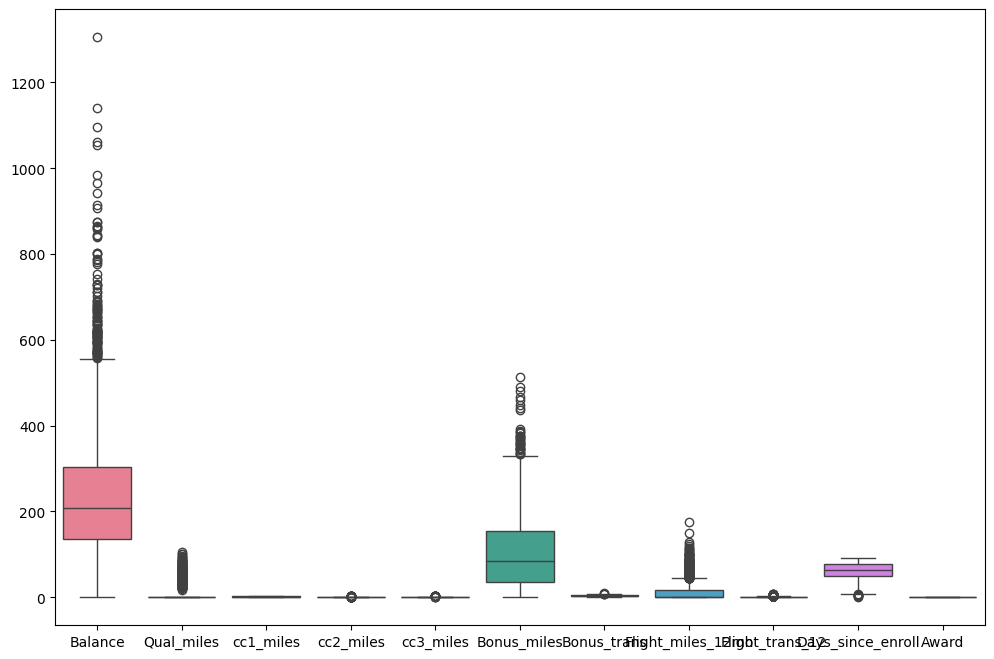

In [19]:
import numpy as np
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))


DATA VISUALIZATION

Counting customers with award and without award

In [20]:
countNotermdeposit = len(df[df.Award == 0])
counthavetermdeposit = len(df[df.Award == 1])
print("Percentage of Customers without an Award: {:.2f}%".format((countNotermdeposit / len(df.Award))*100))
print("Percentage of Customers with an Award: {:.2f}%".format((counthavetermdeposit / len(df.Award))*100))


Percentage of Customers without an Award: 62.96%
Percentage of Customers with an Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

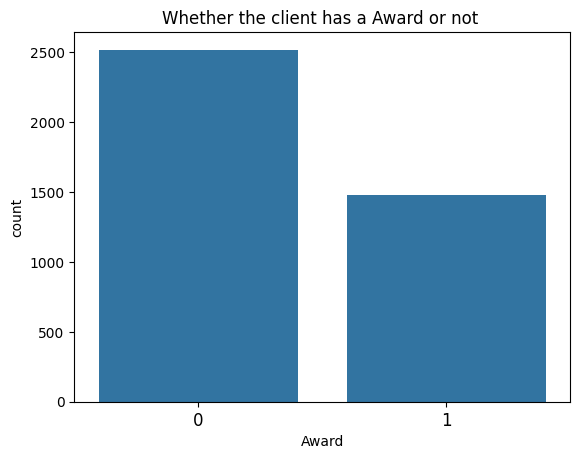

In [22]:
sns.countplot(x='Award', data=df,
              order=df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')


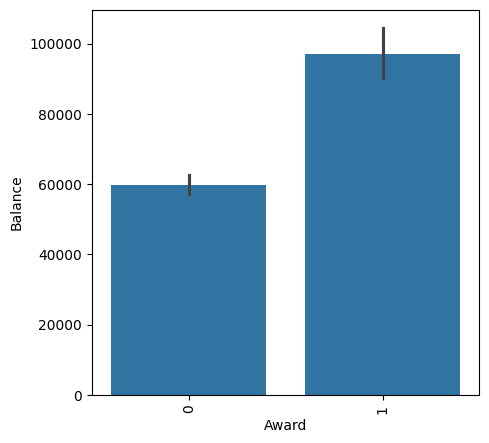

In [23]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [24]:

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

,Balance
Balance,1.000000
Bonus_miles,0.403410
cc1_miles,0.338252
Bonus_trans,0.324797
Days_since_enroll,0.262975
Flight_trans_12,0.255656
Flight_miles_12mo,0.217509
Award,0.178380
Qual_miles,0.108696
cc3_miles,0.035234


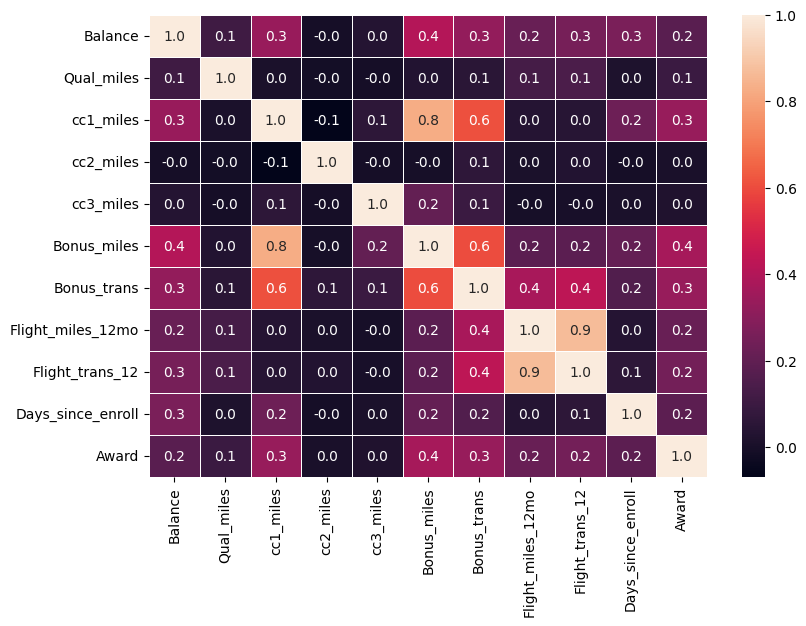

In [25]:
#corelation heatmap
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

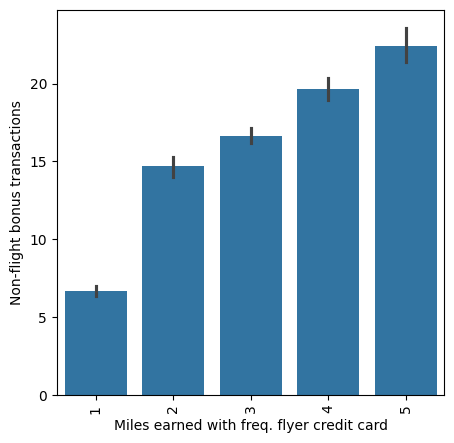

In [26]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (5,5))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

DATA PREPROCESSING

In [27]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(3998, 11)

In [28]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape


(3998, 11)

K-MEANS CLUSTERING

In [29]:
from sklearn.cluster import KMeans


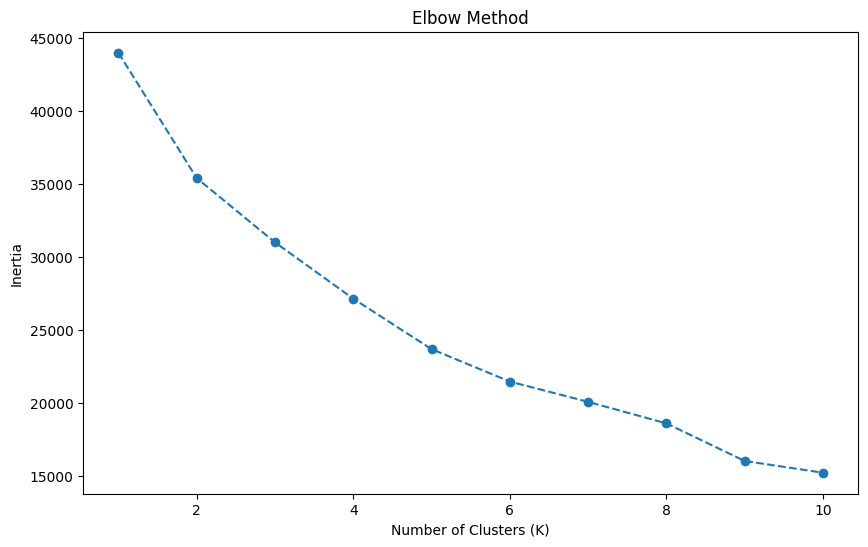

In [30]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(std_df)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [31]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(std_df)


KMeans(n_clusters=6, random_state=42)

In [32]:

df['Kmeans_Cluster'] = kmeans.labels_


<ipython-input-32-68dc8a87c5d3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
# Instead of:
# df.drop('Cluster', axis=1, inplace=True)

# Try this:
# Check if 'Cluster' column exists before dropping
if 'Cluster' in df.columns:
  df.drop('Cluster', axis=1, inplace=True)
else:
  print("Column 'Cluster' not found in DataFrame.")

Column 'Cluster' not found in DataFrame.


In [37]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'Kmeans_Cluster'],
      dtype='object')

In [40]:
fig = px.scatter(df, x=df.columns[0], y=df.columns[1], color='Kmeans_Cluster', # Changed 'Cluster' to 'Kmeans_Cluster'
                 title='K-means Clustering',
                 labels={df.columns[0]: 'Feature 1', df.columns[1]: 'Feature 2', 'Kmeans_Cluster': 'Cluster'}, # Changed 'Cluster' to 'Kmeans_Cluster'
                 color_continuous_scale='viridis')

# Show the plot
fig.show()

HIERARICHAL CLUSTERING

In [41]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch


In [42]:
z = linkage(minmax_df, method = "complete", metric = "euclidean")


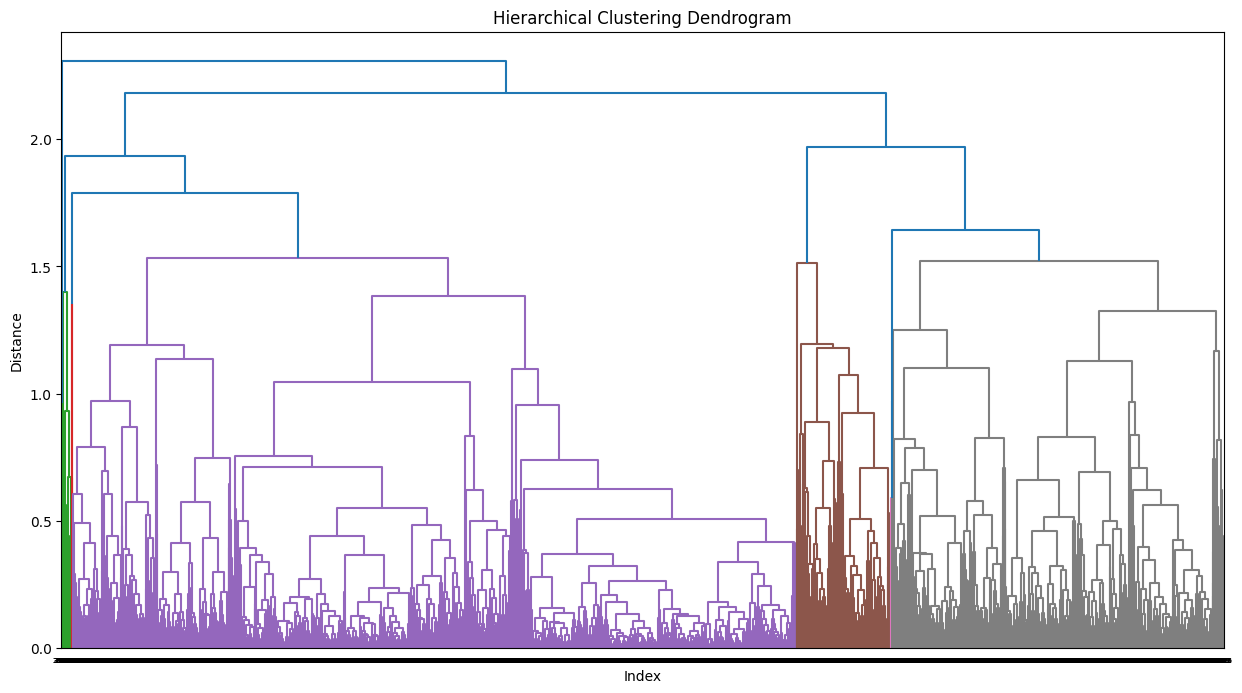

In [43]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering
# When using 'complete' linkage, 'affinity' is implicitly 'euclidean'.
# Remove the 'affinity' argument.
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(minmax_df)
h_complete.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [46]:
cluster_labels = pd.Series(h_complete.labels_)


In [47]:
df['Hierar_Cluster'] = cluster_labels

<ipython-input-47-a6242c021722>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0.0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,5,0.0


In [49]:
df.iloc[:, 0:].groupby(df.Hierar_Cluster).mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster
Hierar_Cluster,,,,,,,,,,,,,
0.0,68840.538217,156.410430,1.984475,1.016322,1.012739,16239.376592,11.381768,473.052548,1.385350,3849.515525,0.353503,1.693073,0.0
1.0,105014.425466,137.503106,2.450311,1.003106,1.006211,24267.229814,13.127329,462.881988,1.512422,5768.198758,0.431677,2.254658,1.0
2.0,76462.136444,122.477993,2.129401,1.014085,1.013204,17364.584507,11.749120,440.167254,1.336268,4312.307218,0.392606,1.806338,2.0
3.0,35757.500000,0.000000,1.500000,1.000000,1.000000,5808.500000,10.250000,37.500000,0.250000,2119.250000,0.250000,0.750000,3.0


We can now clearly see the 4 number of clusters formed, which can be described as under

1. Cluster1 = "0" = Defines the group of fliers that earn the most out of the card and are frequent fliers
2. Cluster2 = "1" = Defines the group of fliers that earn but are the third most frequent fliers
3. Cluster3 = "2" = Defines the group of fliers that earn the least and are the least frequent fliers
4. Cluster4 = "3" = Defines the group of fliers that earn but and are the second most frequent fliers


DBSCAN(Density Based Spatial Clustering of Applications with Noise)

In [50]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))


In [54]:
!pip install scikit-learn
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [52]:
eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))


In [55]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))


A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


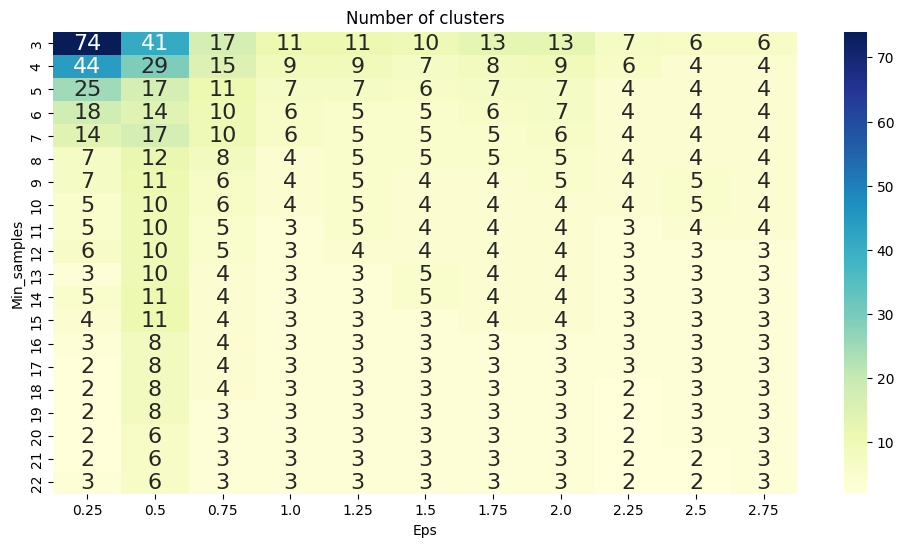

In [56]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

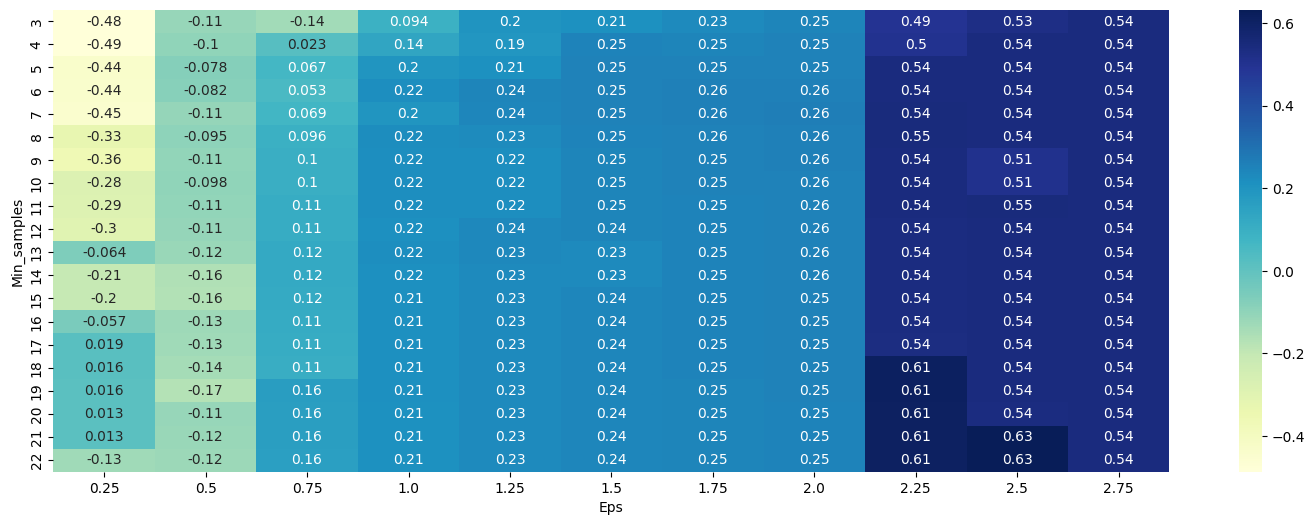

In [57]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [58]:
!pip install scikit-learn
from sklearn.metrics import silhouette_score as sil
import seaborn as sns


In [59]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


In [60]:
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])



epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


In [61]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)


DBSCAN(eps=2.5, min_samples=21)

In [62]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()


<ipython-input-63-a511a5deb116>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster,DBSCAN_labels
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0.0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0.0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0.0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1.0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,5,0.0,0


In [64]:
df.groupby('DBSCAN_labels').agg(['mean'])


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Cluster,Hierar_Cluster
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
-1,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,2.721154,0.639423
0,66025.489182,68.500792,2.035092,1.000000,1.000000,15602.254090,10.883113,305.613193,0.925330,4083.549868,0.353034,1.712137,0.656665


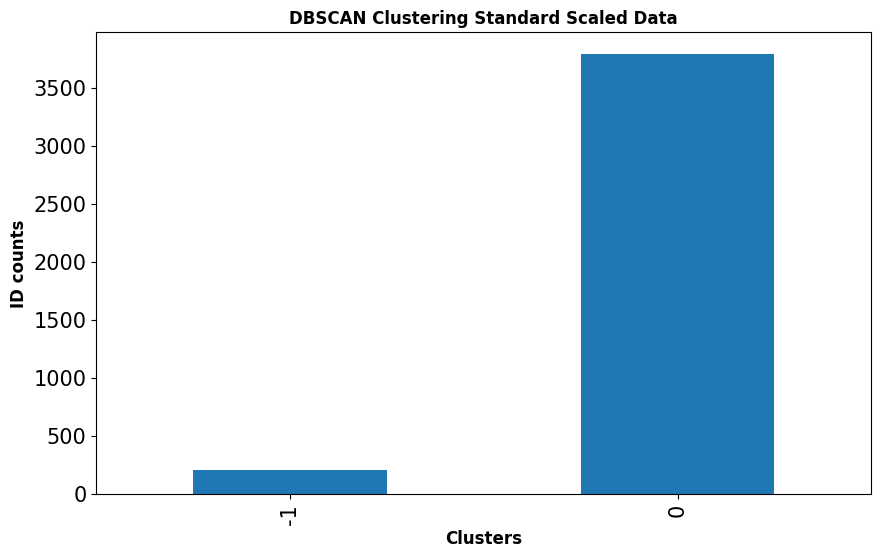

In [65]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('DBSCAN_labels').count()['Balance'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

conculsion:
I have applied EDA to analyze dataset.Discovered correlation between different variables and found colinearity.

Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.

I have used & analyzed 3 clustering techniques here.. i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

By applying clustering on different transformation data shows fluctuation in model score.

So finally the Standard Scaler found less score so not used for further model building. KMeans clustering is sensitive to outliers